In [1]:
import os
import torch
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

from conditional_rate_matching.configs.config_files import ExperimentFiles

from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig,CRMTrainerConfig,BasicPipelineConfig

from conditional_rate_matching.models.metrics.metrics_utils import MetricsAvaliable

from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_music import experiment_music_conditional_config
from conditional_rate_matching.models.temporal_networks.temporal_networks_config import SequenceTransformerConfig
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig

/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.1-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Set Config

In [2]:
device = 'cuda:3'

config:CRMConfig = experiment_music_conditional_config()
config.temporal_network = SequenceTransformerConfig(num_layers=2, num_heads=2)

config.trainer = CRMTrainerConfig(number_of_epochs=3,
                                  learning_rate=1e-3,
                                  metrics=[MetricsAvaliable.music_plot],
                                  max_test_size=30,
                                  device = device)

config.pipeline = BasicPipelineConfig(number_of_steps=100)

config.optimal_transport = OptimalTransportSamplerConfig(name="uniform", method='exact')

# Train a Model

In [3]:
experiment_files = ExperimentFiles(experiment_name="crm",
                                   experiment_type="tutorial_music",
                                   experiment_indentifier=None)

crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()

# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
tutorial_music
crm
None
# ==================================================
# Number of Epochs 3
# ==================================================


Epoch 3, Loss: 3.4970: 100%|██████████| 3/3 [00:19<00:00,  6.43s/it]


# Read and Sample from a Model

In [4]:
crm_trainer.generative_model.config.pipeline.number_of_steps = 100
sample_x = crm_trainer.generative_model.pipeline(sample_size=10,train=False)

0it [00:00, ?it/s]

100it [00:00, 192.58it/s]


In [5]:
# IN THIS EXAMPLE CREATE FROM SAMPLE TO NETWORKX GRAPHS
crm = crm_trainer.generative_model

## Read results only (without model initialization)

In [6]:
experiment_files = ExperimentFiles(experiment_dir=experiment_files.experiment_dir)
results_ = experiment_files.load_results()

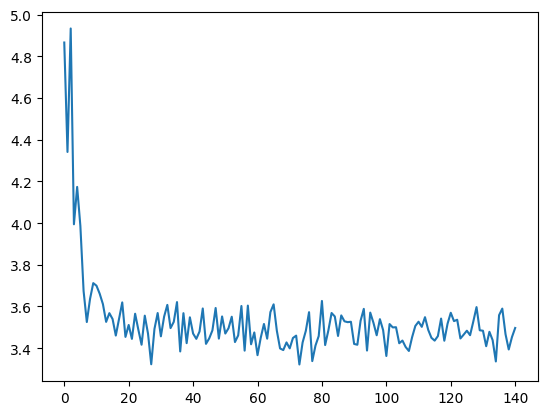

In [7]:
plt.plot(results_["all_training_loss"])

# Calculate a Metric Again

In [8]:
from conditional_rate_matching.models.metrics.metrics_utils import log_metrics, MetricsAvaliable
metrics_avaliable = MetricsAvaliable()

In [32]:
crm.config.data1.conditional_model

True

In [9]:
# number of samples requiered to calculate the test 
# this number should not be that big as the sample and paths are stored to perform the statistics
crm.config.pipeline.number_of_steps = 100
crm.config.data1.test_size 
log_metrics(crm, epoch=None, all_metrics = {}, metrics_to_log={metrics_avaliable.music_plot})

100it [00:01, 79.09it/s]


TypeError: can't convert cuda:3 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [34]:
metric_string = metrics_avaliable.mse_histograms
test_statistics = []
for i in range(10):
    metrics = log_metrics(crm,all_metrics={},metrics_to_log={metric_string})
    print(metrics)
    test_statistics.append(metrics["music_plot"])
test_statistics

KeyboardInterrupt: 

In [29]:
test_statistics.mean(),test_statistics.std()

(0.015064474474638701, 0.005237514815823908)